##### Michał Hemperek, 23.03.2024
# Sprawozdanie 3

In [1]:
using Markdown
using Plots

$$ $$
### Zadanie 1.

a) Jednomiany \
$W(x) = ax^2 + bx + c$ \
$ax_0^2 + bx_0 + c = y_0$ \
$ax_1^2 + bx_1 + c = y_1$ \
$ax_2^2 + bx_2 + c = y_2$

In [2]:
points = [[-1,2.4], [1,1.8], [2,4.5]]

3-element Vector{Vector{Float64}}:
 [-1.0, 2.4]
 [1.0, 1.8]
 [2.0, 4.5]

In [3]:
A = reduce(vcat,(x -> [x[1]^2 x[1] 1]).(points))

3×3 Matrix{Float64}:
 1.0  -1.0  1.0
 1.0   1.0  1.0
 4.0   2.0  1.0

In [4]:
B = (i -> points[i][2]).(1:3)

3-element Vector{Float64}:
 2.4
 1.8
 4.5

In [5]:
a_coeffs = (x -> round(x, digits=12)).(A \ B)
#a_coeffs = A \ B
md"""
Szukany wielomian to:
$
W(x) = $(a_coeffs[1]) x^2 + ( $(a_coeffs[2]) ) x + $(a_coeffs[3])
$
"""

Szukany wielomian to: $ W(x) = 1.0 x^2 + ( -0.3 ) x + 1.1 $


$$ $$
$$ $$

b) Wielomiany Lagrange'a

$$
i = 0:
\ell_0(x) = \frac{(x - 1)(x - 2)}{(-1 - 1)(-1 - 2)} = \frac{(x - 1)(x - 2)}{6}
$$

$$
i = 1:
\ell_1(x) = \frac{(x + 1)(x - 2)}{(1 + 1)(1 - 2)} = \frac{(x + 1)(x - 2)}{-2}
$$

$$
i = 2:
\ell_2(x) = \frac{(x + 1)(x - 1)}{(2 + 1)(2 - 1)} = \frac{(x + 1)(x - 1)}{3}
$$

$$
P(x) = 2.4 \cdot \frac{(x - 1)(x - 2)}{6} + 1.8 \cdot \frac{(x + 1)(x - 2)}{-2} + 4.5 \cdot \frac{(x + 1)(x - 1)}{3}
$$

$$
P(x) = 0.4(x - 1)(x - 2) - 0.9(x + 1)(x - 2) + 1.5(x + 1)(x - 1)
$$

$$
P(x) = 0.4(x^2 - 3x + 2) - 0.9(x^2 - x - 2) + 1.5(x^2 - 1)
$$

$$
P(x) = 0.4x^2 - 1.2x + 0.8 - 0.9x^2 + 0.9x + 1.8 + 1.5x^2 - 1.5
$$

$$
P(x) = (0.4 - 0.9 + 1.5)x^2 + (-1.2 + 0.9)x + (0.8 + 1.8 - 1.5)
$$

$$
P(x) = 1x^2 - 0.3x + 1.1
$$

 $$ $$

c) Wielomiany Newton'a
$$
f[x_i, x_{i+1}, \dots, x_{i+k}] = \frac{f[x_{i+1}, x_{i+2}, \dots, x_{i+k}] - f[x_i, x_{i+1}, \dots, x_{i+k-1}]}{x_{i+k} - x_i}
$$

Gdzie:
- $ (f[x_i, x_{i+1}, \dots, x_{i+k}]) $ to różnica dzielona,
- $ (x_i, x_{i+1}, \dots, x_{i+k}) $ to węzły interpolacji.

Obliczmy różnice dzielone dla naszych danych:

1. Różnice dzielone pierwszego rzędu:

$$
f[x_0, x_1] = \frac{1.8 - 2.4}{1 - (-1)} = -0.3
$$

$$
f[x_1, x_2] = \frac{4.5 - 1.8}{2 - 1} = 2.7
$$

2. Różnice dzielone drugiego rzędu:

$$
f[x_0, x_1, x_2] = \frac{2.7 - (-0.3)}{2 - (-1)} = 1
$$

Teraz możemy skonstruować wielomian Newtona korzystając z tych różnic dzielonych. Wielomian Newtona ma postać:

$$
P(x) = f[x_0] + (x - x_0) f[x_0, x_1] + (x - x_0)(x - x_1) f[x_0, x_1, x_2] + \dots
$$

W naszym przypadku:

$$
P(x) = 2.4 + (x + 1)\cdot(-0.3) + (x + 1)(x - 1)\cdot(1)
$$

Po uproszczeniu:

$$
P(x) = 2.4 - 0.3(x + 1) + (x^2 - 1)
$$

$$
P(x) = 2.4 - 0.3x - 0.3 + x^2 - 1
$$

$$
P(x) = x^2 - 0.3x + 1.1
$$

 \
 $ $
 Wszystkie 3 metody dają ten sam wielomian:

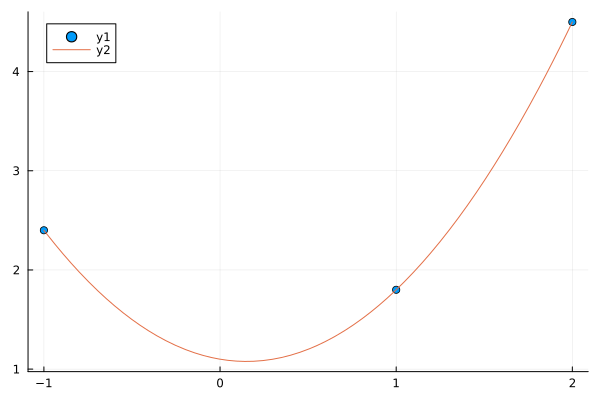

In [6]:
plot((x -> x[1]).(points), (x -> x[2]).(points), seriestype=:scatter)
plot!(x -> a_coeffs[1]*x*x + a_coeffs[2]*x + a_coeffs[3])

$$ $$
$$ $$

### Zadanie 2.
$$ p(t) = 3t^3 – 7t^2 + 5t – 4 = t(t(3t - 7) + 5) - 4  $$

$$ $$
$$ $$

### Zadanie 3.

a) Ewaluując za pomocą schematu Hornera dostajemy $n-1$ mnożeń.

b) Aby obliczyć wyraz $L_k$ musi wykonać $n-1$ mnożeń. \
Wyrazów jest $n$ stąd, aby wyliczyć wszystkie wyrazy $L$ \
musimy wykonać $n \cdot (n − 1)$ mnożeń, a jeszcze dodatkowo \
każdy z wyrazów mnożymy przez rzędną, więc w sumie dostajemy: \
$n \cdot (n − 1) + n = n^2$ mnożeń.

c) Obliczenie $p_k$ zajmuje $k$ mnożeń, a $k \in \langle 0, n − 1 \rangle $, \
stąd ilość mnożeń jaką musimy wykonać to: $\Sigma^{n−1}_{k=1} k = n^2 ~$.